# 02. Neural network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

print(f'Sample size and output size: {len(X)}, {len(y)}')
print(f'First five samples: {X[:5]}') # We can see there're two features
print(f'First five output: {y[:5]}') # binary classification, so it's 0 or 1

Sample size and output size: 1000, 1000
First five samples: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five output: [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

print(circles.head(10))

         X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0


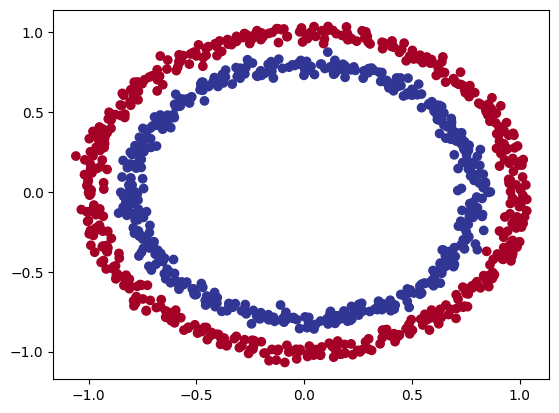

In [ ]:
# Visualize the graph
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note : The data we're working with is often referred to as a toy dataset, as dataset is small enough to experiment but still sizeable enoght to practice the fundamentals

### 1.1 Check input and output shapes

In [ ]:
print(X.shape, y.shape) # they are numpy arrays

X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape} and y: {y_sample.shape}')

(1000, 2) (1000,)
Values for one sample of X: [0.75424625 0.23148074] and y: 1
Shapes for one sample of X: (2,) and y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.9.0+cu126'

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_sample = X[0]
y_sample = y[0]
print(f'Values for one sample of X: {X_sample} and y: {y_sample}')
print(f'Shapes of X: {X.shape} and y: {y.shape}')


Values for one sample of X: tensor([0.7542, 0.2315]) and y: 1.0
Shapes of X: torch.Size([1000, 2]) and y: torch.Size([1000])


In [ ]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f'Size of X_train: {len(X_train)}, y_train: {len(y_train)}, X_test: {len(X_test)}, y_test: {len(y_test)}')


Size of X_train: 800, y_train: 800, X_test: 200, y_test: 200


## 2. Building a model

Let's build a model to classify the blue and red dots.

To do so:
1. Setup device agonistic code
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and an optimizer
4. Create a training and testing loop

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

Let's create a model that:


1.   Subclasses `nn.Module`
2.   Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outliers the forward pass of the model
4. Instantiate an instance of our model calls and send it to the target `device`

Note: we could use https://playground.tensorflow.org/ to build an NN and predict loss in advance



In [ ]:
# 1. Model class
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscale up to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same as y)

  # 3. Define forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of model class
model_0 = CircleModelV0().to(device)
print(model_0)
print(next(model_0.parameters()))

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)
Parameter containing:
tensor([[-0.0363,  0.4338],
        [-0.5064,  0.1345],
        [-0.0925,  0.0164],
        [ 0.2848, -0.5166],
        [-0.0219,  0.6260]], device='cuda:0', requires_grad=True)


In [ ]:
# Let's replicate the model above using nn.Sequential()...We could move this code into init()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

print(model_0)
print(model_0.state_dict())

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)
OrderedDict({'0.weight': tensor([[-6.5547e-04, -6.5772e-01],
        [-3.9204e-01, -1.3261e-02],
        [ 6.3692e-01,  4.5053e-02],
        [ 1.2136e-01,  3.0585e-01],
        [-3.2588e-01,  3.0617e-01]], device='cuda:0'), '0.bias': tensor([-0.2784, -0.1122,  0.1945, -0.5170,  0.4218], device='cuda:0'), '1.weight': tensor([[ 0.2177, -0.0336,  0.3487, -0.3928, -0.2565]], device='cuda:0'), '1.bias': tensor([-0.0432], device='cuda:0')})


In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 10 predictions:\n{untrained_preds[:10]}')
print(f'\nFirst 10 labels:\n{y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.2613],
        [-0.2458],
        [-0.0253],
        [-0.3294],
        [ 0.4140],
        [ 0.4201],
        [ 0.1156],
        [ 0.2727],
        [-0.0442],
        [-0.2399]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer?

This is problem specific.

For classification it's common using binary cross entropy or categorical cross entropy.

And for optimizers, two of the most common and useful are SGD and Adam.

In [ ]:
# Setup the loss function and optimizer
# BCELoss requires the input have gone through the sigmoid activation function layer before
loss_fn = torch.nn.BCEWithLogitsLoss() # has sigmoid activation built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate the accuracy - out of 100 examples, what percentage does the model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return (correct/len(y_pred)) * 100

## 3. Train model



1.   Forward pass
2.   Calculate the loss
3. Optimizer zero grad
4. Loss Backward
5. Optimizer step



### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

The model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function. (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert the probabilities to prediction labels by either rounding them or taking the `argmax()`

In [ ]:
# View the first 5 outputs of the forward pass on test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

print(y_logits)


tensor([[-0.2613],
        [-0.2458],
        [-0.0253],
        [-0.3294],
        [ 0.4140]], device='cuda:0')


In [ ]:
# Use sigmoid activation function to turn logits into probabilities
y_pred_probs = torch.sigmoid(y_logits)
print(y_pred_probs)
print(torch.round(y_pred_probs))

tensor([[0.4350],
        [0.4389],
        [0.4937],
        [0.4184],
        [0.6020]], device='cuda:0')
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0')


For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Model performance
print(torch.eq(y_pred_labels.squeeze().to(device), y_test[:5].to(device)))

tensor([True, True, True, True, True], device='cuda:0')
tensor([False,  True, False,  True,  True], device='cuda:0')


### 3.2 Building a training and testing loop

In [ ]:
def train_and_testing_loop(model,
                           X_train=X_train,
                           y_train=y_train,
                           X_test=X_test,
                           y_test=y_test):
  torch.manual_seed(42)
  torch.cuda.manual_seed(42)

  epochs = 1000

  X_train, y_train = X_train.to(device), y_train.to(device)
  X_test, y_test = X_test.to(device), y_test.to(device)
  model.to(device)

  for epoch in range(epochs):
    model.train()

    # Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Compute loss
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss expects raw logits as input
    # loss = loss_fn(torch.sigmoid(y_logits), y_train) if using BCELoss
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

    ## Testing
    model.eval()

    with torch.inference_mode():
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

      if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Accuracy: {acc:.2f}% | Test accuracy: {test_acc:.2f}%')

train_and_testing_loop(model_0)

Epoch: 0 | Loss: 0.70417 | Test Loss: 0.69759 | Accuracy: 51.00% | Test accuracy: 48.00%
Epoch: 10 | Loss: 0.70194 | Test Loss: 0.69632 | Accuracy: 50.75% | Test accuracy: 47.50%
Epoch: 20 | Loss: 0.70031 | Test Loss: 0.69545 | Accuracy: 50.62% | Test accuracy: 48.00%
Epoch: 30 | Loss: 0.69907 | Test Loss: 0.69483 | Accuracy: 50.62% | Test accuracy: 48.50%
Epoch: 40 | Loss: 0.69810 | Test Loss: 0.69437 | Accuracy: 50.88% | Test accuracy: 49.00%
Epoch: 50 | Loss: 0.69732 | Test Loss: 0.69404 | Accuracy: 50.75% | Test accuracy: 49.00%
Epoch: 60 | Loss: 0.69668 | Test Loss: 0.69379 | Accuracy: 50.38% | Test accuracy: 49.00%
Epoch: 70 | Loss: 0.69616 | Test Loss: 0.69361 | Accuracy: 50.25% | Test accuracy: 49.50%
Epoch: 80 | Loss: 0.69573 | Test Loss: 0.69348 | Accuracy: 50.12% | Test accuracy: 49.00%
Epoch: 90 | Loss: 0.69536 | Test Loss: 0.69338 | Accuracy: 50.62% | Test accuracy: 49.50%
Epoch: 100 | Loss: 0.69505 | Test Loss: 0.69332 | Accuracy: 50.50% | Test accuracy: 48.50%
Epoch: 110

## 4. Make predictions and evaluate the model

From the metrics it looks like the model isn't learning anything.

So to inspect it let's make some predictions and make them visual.

To do so, let's import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("File helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


Download helper_functions.py


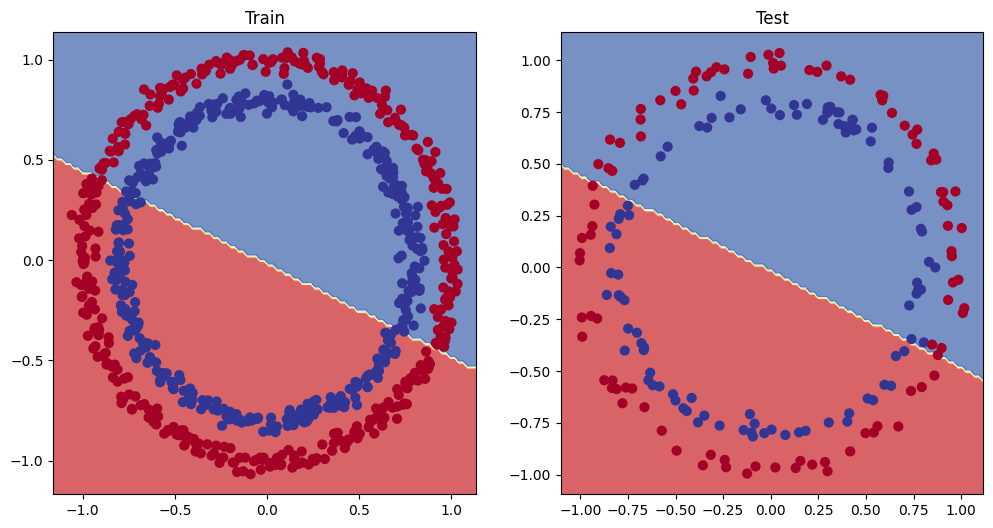

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data.
* Add more hidden units - go from 5 hidden units to 10 hidden units, for the same reason above
* Fit for longer - increamenting epochs
* Changing the activation functions
* Change the learning rate
* Change the loss function
* Change the optimization function

Since these options are all values we can change, they are referred as **hyperparameters**

In [ ]:
# Let's try to add more layers and hidden units
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=128)
    self.layer_2 = nn.Linear(in_features=128, out_features=256)
    self.layer_3 = nn.Linear(in_features=256, out_features=512)
    self.layer_4 = nn.Linear(in_features=512, out_features=1)

  # forward pass
  def forward(self, x):
    return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)))) # x -> layer_1 -> layer_2 -> output

Epoch: 0 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 10 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 20 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 30 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 40 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 50 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 60 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 70 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 80 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 90 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 100 | Loss: 0.69340 | Test Loss: 0.69455 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 110

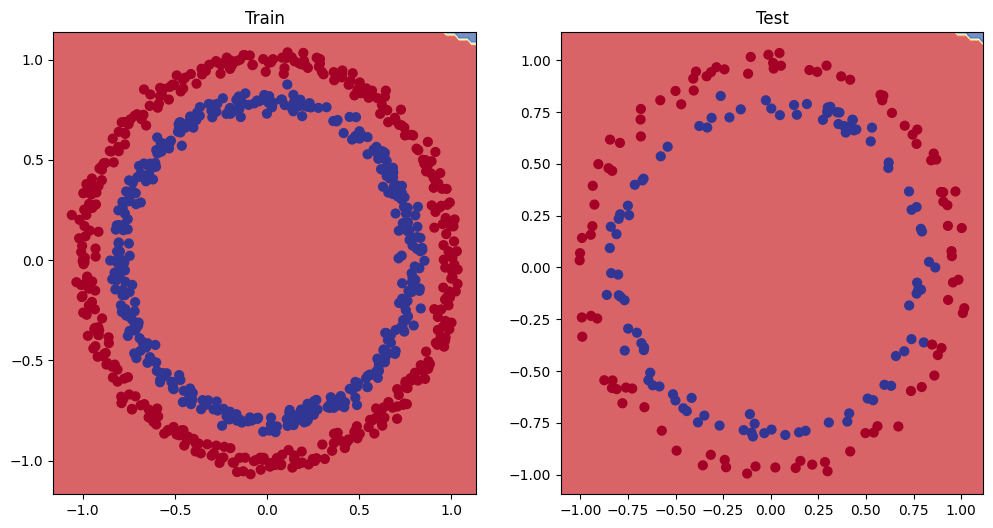

In [ ]:
model_1 = CircleModelV1().to(device)
train_and_testing_loop(model_1)

# Plot decision boundary of the model
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# We can see that there's no way to separate red dots and blue dots with only linear layers

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [ ]:
# Create some data

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

print(len(y_train_regression), len(X_train_regression), len(y_test_regression), len(X_test_regression))

40 40 10 10


### 5.2 Adjusting `model_1` to fit a straight line

Epoch: 0 | Loss: 0.6246625781059265 | Test loss: 0.5800367593765259
Epoch: 10 | Loss: 0.25303348898887634 | Test loss: 0.3501778244972229
Epoch: 20 | Loss: 0.18847617506980896 | Test loss: 0.38530322909355164
Epoch: 30 | Loss: 0.13210202753543854 | Test loss: 0.41634830832481384
Epoch: 40 | Loss: 0.11993515491485596 | Test loss: 0.39725032448768616
Epoch: 50 | Loss: 0.10824378579854965 | Test loss: 0.3377438187599182
Epoch: 60 | Loss: 0.12830963730812073 | Test loss: 0.3281373083591461
Epoch: 70 | Loss: 0.11421576887369156 | Test loss: 0.3207458257675171
Epoch: 80 | Loss: 0.10096020996570587 | Test loss: 0.2962532937526703
Epoch: 90 | Loss: 0.10829975455999374 | Test loss: 0.2737356126308441
Epoch: 100 | Loss: 0.09451872855424881 | Test loss: 0.27240562438964844
Epoch: 110 | Loss: 0.08763992041349411 | Test loss: 0.25389179587364197
Epoch: 120 | Loss: 0.07772974669933319 | Test loss: 0.24591027200222015
Epoch: 130 | Loss: 0.06824429333209991 | Test loss: 0.21009908616542816
Epoch: 140 

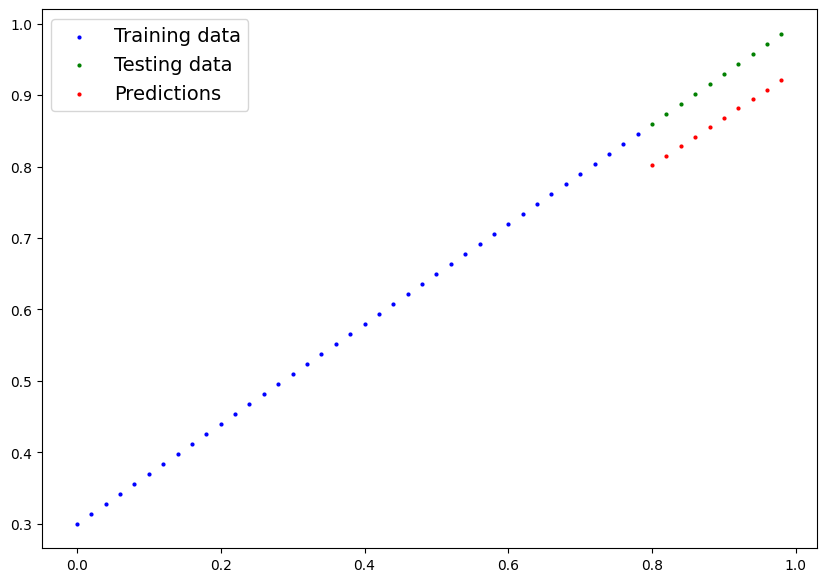

In [ ]:
# Same architecture as model_1
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=128),
    nn.Linear(in_features=128, out_features=256),
    nn.Linear(in_features=256, out_features=512),
    nn.Linear(in_features=512, out_features=1)
)

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

torch.manual_seed(42)

# An epoch is one loop through the data
epochs = 1000 # another hyperparameter

# Track the training
epoch_count = []
loss_values = []
test_loss_values = []

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

model_2.to(device)

### Training
# 0. loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_2.train() # sets all parameters that require gredient to true

  # 1. Forward pass
  y_pred = model_2(X_train_regression)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step() # by default how the optimizer changes will accumulate through the loop, so we have to zero them in step 3 for the next loop


  ### Testing
  model_0.eval() # turns off different settings in the model not needed (dropout/batch norm layer)
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_2(X_test_regression)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

with torch.inference_mode():
  y_preds_new = model_2(X_test_regression)
  plot_predictions(predictions=y_preds_new.cpu(),
                   train_data=X_train_regression.cpu(),
                   train_labels=y_train_regression.cpu(),
                   test_data=X_test_regression.cpu(),
                   test_labels=y_test_regression.cpu())


## 6. The missing piece: non-linearity

"What patterns could we draw if we are given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

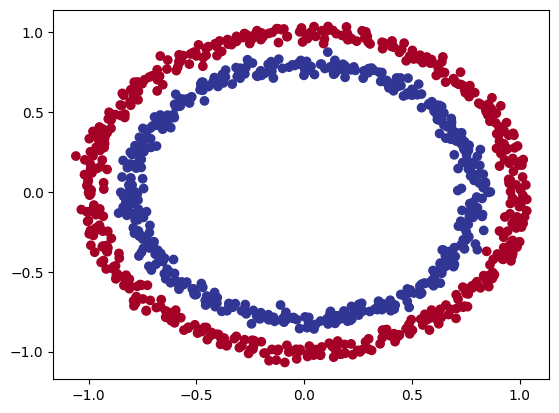

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### 6.2 Building a model with non-linearity

Artificail neural networks are a large combination of linear and non-linear functions which are able to find patterns in data

In [ ]:
# Build a model with non-linear activation function
import torch
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=128)
    self.layer_2 = nn.Linear(in_features=128, out_features=256)
    self.layer_3 = nn.Linear(in_features=256, out_features=512)
    self.layer_4 = nn.Linear(in_features=512, out_features=1)
    self.relu = nn.ReLU() # non-linear activation function

  def forward(self, x):
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))) # activation function should be applied to each hidden layer

model_3 = CircleModelV2()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=512, bias=True)
  (layer_4): Linear(in_features=512, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
## Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### 6.3 Training a non-linear model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model_3.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Compute loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss expects raw logits as input
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) if using BCELoss
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  ## Testing
  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Accuracy: {acc:.2f}% | Test accuracy: {test_acc:.2f}%')


Epoch: 0 | Loss: 0.69325 | Test Loss: 0.69341 | Accuracy: 50.00% | Test accuracy: 50.00%
Epoch: 100 | Loss: 0.66973 | Test Loss: 0.67375 | Accuracy: 76.12% | Test accuracy: 71.00%
Epoch: 200 | Loss: 0.58161 | Test Loss: 0.59598 | Accuracy: 98.75% | Test accuracy: 98.00%
Epoch: 300 | Loss: 0.45008 | Test Loss: 0.49203 | Accuracy: 64.88% | Test accuracy: 65.00%
Epoch: 400 | Loss: 0.31667 | Test Loss: 0.36602 | Accuracy: 83.62% | Test accuracy: 79.00%
Epoch: 500 | Loss: 0.03973 | Test Loss: 0.06339 | Accuracy: 100.00% | Test accuracy: 100.00%
Epoch: 600 | Loss: 0.01834 | Test Loss: 0.03457 | Accuracy: 100.00% | Test accuracy: 100.00%
Epoch: 700 | Loss: 0.01145 | Test Loss: 0.02443 | Accuracy: 100.00% | Test accuracy: 100.00%
Epoch: 800 | Loss: 0.00818 | Test Loss: 0.01932 | Accuracy: 100.00% | Test accuracy: 100.00%
Epoch: 900 | Loss: 0.00631 | Test Loss: 0.01621 | Accuracy: 100.00% | Test accuracy: 100.00%


### 6.4 Evaluating a non-linear model


In [ ]:
model_3.eval()
with torch.inference_mode():
    y_pred = torch.round(torch.sigmoid(model_3.to(device)(X_test.to(device)).squeeze())).to(device)

print(y_pred[:10], y_test[:10])
print(y_pred[:10].eq(y_test[:10]))

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0') tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')
tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')


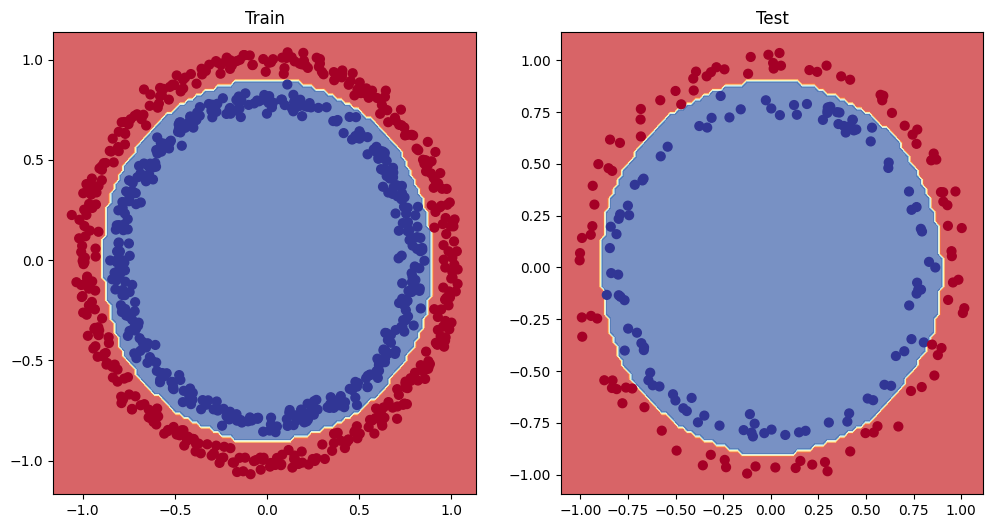

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural network, rather than telling model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])


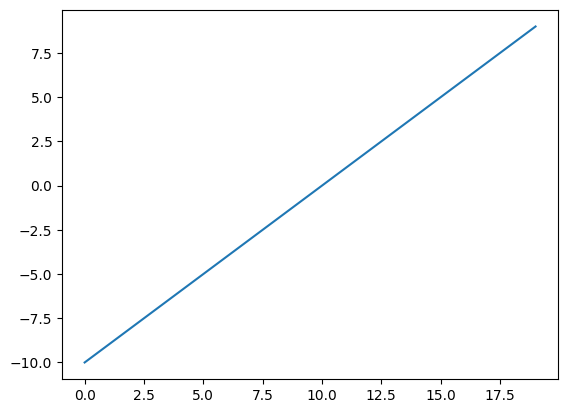

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1.0)
print(A)

# Visualize the tensor
plt.plot(A)

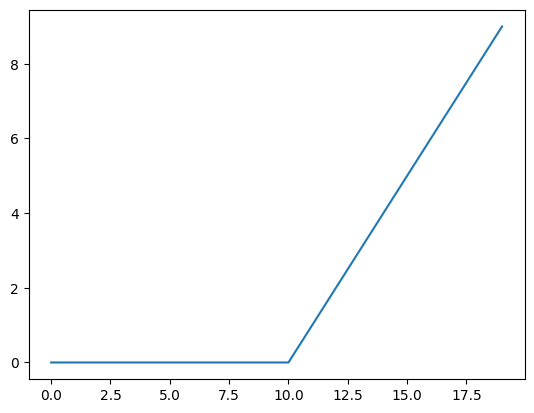

In [ ]:
plt.plot(torch.relu(A))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


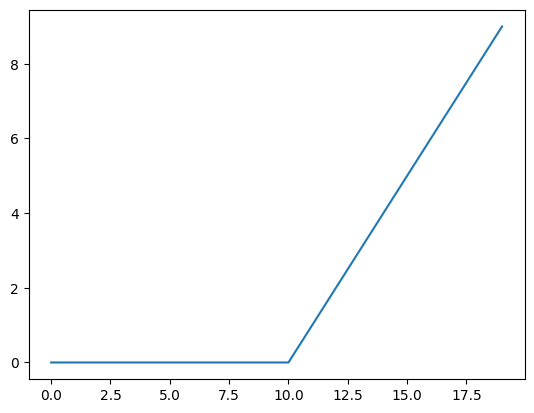

In [ ]:
def relu(x) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

output = relu(A)
print(output)
plt.plot(output)

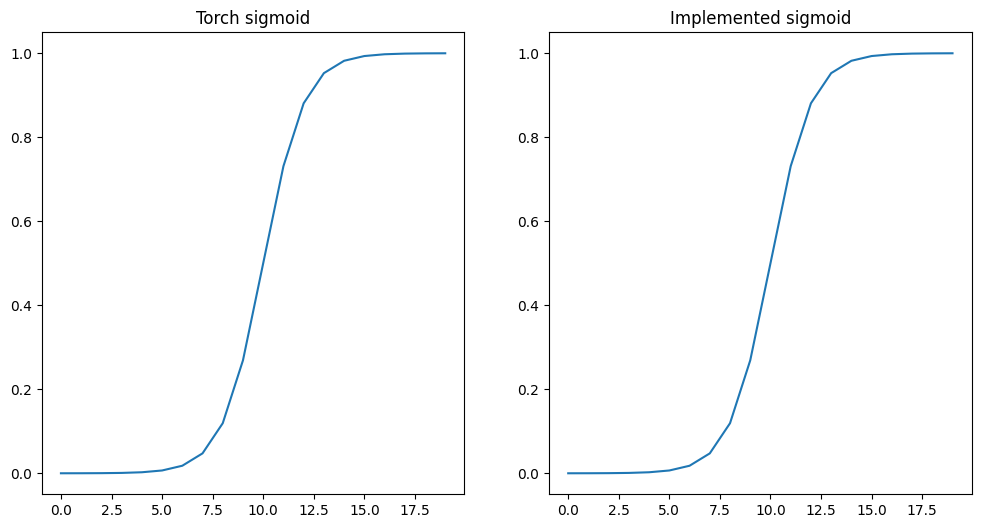

In [ ]:
# Sigmoid
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Torch sigmoid")
plt.plot(torch.sigmoid(A))

def sigmoid(x) -> torch.tensor:
  return 1 / (1 + torch.exp(-x))

plt.subplot(1,2,2)
plt.title("Implemented sigmoid")
plt.plot(torch.sigmoid(A))


## 8. Putting it all together with a multi-class classification

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

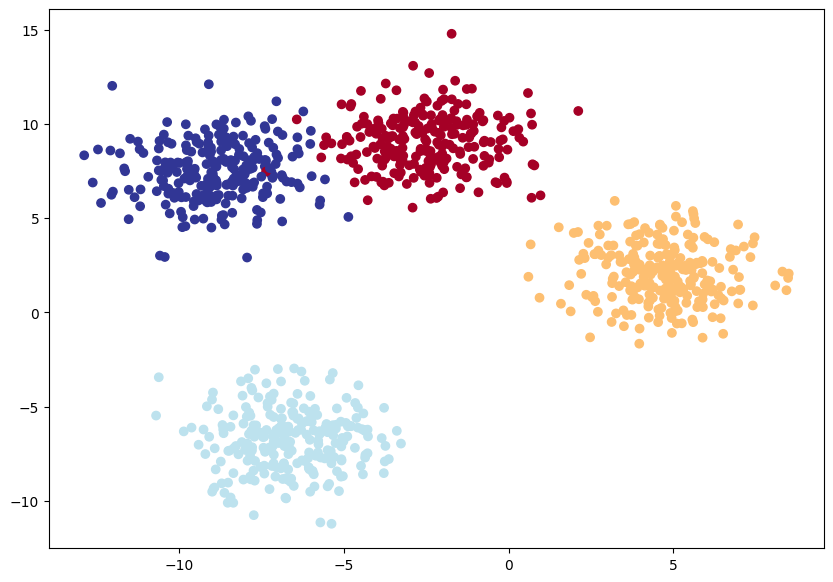

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES =2
RANDOM_SEED = 42

# 1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))

plt.scatter(x=X_blob[:,0],
            y=X_blob[:,1],
            c=y_blob,
            cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
      Initializes multi-class classification model.

      Args:
        input_features (int): Number of input features to the mode
        output_features (int): Number of outputs features (number of output classes)
        hidden_units (int): Number of hidden units between layers, default=8

      Return:

      Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=64).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for multi-class classification model

In [ ]:
## Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.01)

### 8.4 Getting prediction probabilities for a multi-class model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction label.

Logits -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [ ]:
# Let's get the logits of the model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_train.to(device))

print(X_blob_train[:5], y_logits[:5], y_blob_test[:5])

tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        [-6.0262, -4.4375],
        [-3.3397,  7.2175]]) tensor([[ 0.2443, -0.7129, -0.5325, -0.0103],
        [-0.2667, -0.6605, -0.3325,  0.3062],
        [-1.8017,  0.1060, -0.6938, -0.8926],
        [-0.9034, -0.0412, -0.3766, -0.5284],
        [-0.2511, -0.5636, -0.3170,  0.2626]], device='cuda:0') tensor([1, 3, 2, 1, 0])


In [ ]:
# Convert the model's logit outputs to prediction probablities
y_blob_pred_probs = torch.softmax(y_logits, dim=1)
print(y_blob_pred_probs[:5], y_logits[:5])

print(torch.argmax(y_blob_pred_probs[0]))

# Convert the prediction probabilities to prediction label
y_preds = torch.argmax(y_blob_pred_probs, dim=1)
print(y_preds[:10], y_blob_train[:10])

tensor([[0.3818, 0.1466, 0.1756, 0.2960],
        [0.2281, 0.1538, 0.2136, 0.4045],
        [0.0755, 0.5086, 0.2286, 0.1874],
        [0.1534, 0.3634, 0.2599, 0.2233],
        [0.2305, 0.1686, 0.2158, 0.3852]], device='cuda:0') tensor([[ 0.2443, -0.7129, -0.5325, -0.0103],
        [-0.2667, -0.6605, -0.3325,  0.3062],
        [-1.8017,  0.1060, -0.6938, -0.8926],
        [-0.9034, -0.0412, -0.3766, -0.5284],
        [-0.2511, -0.5636, -0.3170,  0.2626]], device='cuda:0')
tensor(0, device='cuda:0')
tensor([0, 3, 1, 1, 3, 3, 3, 0, 3, 3], device='cuda:0') tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0])


### 8.5 Creating a training and testing loop for a multi-class model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

print(X_blob_train.shape, y_blob_train.shape, X_blob_test.shape, y_blob_test.shape)

model_4.to(device)

for epoch in range(epochs):
  model_4.train()
  # Forward pass
  y_logits = model_4(X_blob_train)
  y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

  # Compute the loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_preds)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Backward loss
  loss.backward()

  # Optimizer step
  optimizer.step()

  ## Testing
  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 100 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Accuracy: {acc:.2f}% | Test accuracy: {test_acc:.2f}%')


torch.Size([800, 2]) torch.Size([800]) torch.Size([200, 2]) torch.Size([200])
Epoch: 0 | Loss: 1.44024 | Test Loss: 1.24596 | Accuracy: 23.88% | Test accuracy: 34.50%
Epoch: 100 | Loss: 0.10496 | Test Loss: 0.10026 | Accuracy: 98.88% | Test accuracy: 99.50%
Epoch: 200 | Loss: 0.06041 | Test Loss: 0.05462 | Accuracy: 99.00% | Test accuracy: 99.50%
Epoch: 300 | Loss: 0.04706 | Test Loss: 0.04039 | Accuracy: 99.12% | Test accuracy: 99.50%
Epoch: 400 | Loss: 0.04083 | Test Loss: 0.03359 | Accuracy: 99.12% | Test accuracy: 99.50%
Epoch: 500 | Loss: 0.03724 | Test Loss: 0.02958 | Accuracy: 99.12% | Test accuracy: 99.50%
Epoch: 600 | Loss: 0.03492 | Test Loss: 0.02692 | Accuracy: 99.12% | Test accuracy: 99.50%
Epoch: 700 | Loss: 0.03331 | Test Loss: 0.02502 | Accuracy: 99.12% | Test accuracy: 99.50%
Epoch: 800 | Loss: 0.03212 | Test Loss: 0.02360 | Accuracy: 99.12% | Test accuracy: 99.50%
Epoch: 900 | Loss: 0.03122 | Test Loss: 0.02249 | Accuracy: 99.12% | Test accuracy: 99.50%


### 8.6 Evaluating a multi-class model

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_preds = torch.argmax(torch.softmax(model_4.to(device)(X_blob_test.to(device)), dim=1), dim=1)

print(y_preds[:10], y_blob_test[:10])
print(torch.eq(y_preds[:10], y_blob_test[:10]))

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0') tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')


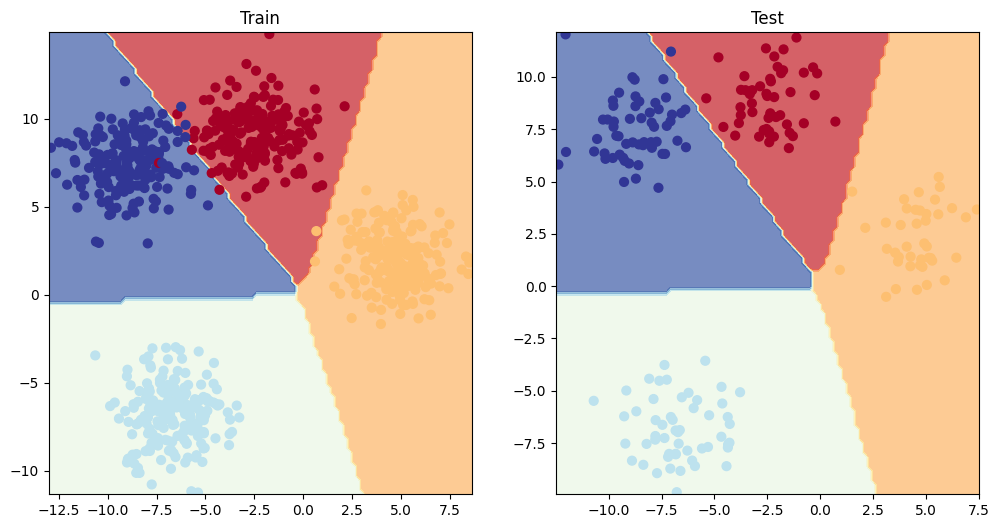

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics to evaluate the model

* Accurary - out of 100 samples, how many does the model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification matrix

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 27.6 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="MULTICLASS", num_classes=4).to(device)

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

## Exercises

### 1. Make a binary classification dataset with Scikit-Learn's make_moons() function.

* For consistency, the dataset should have 1000 samples and a random_state=42.
* Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

torch.Size([100, 2]) torch.Size([100])


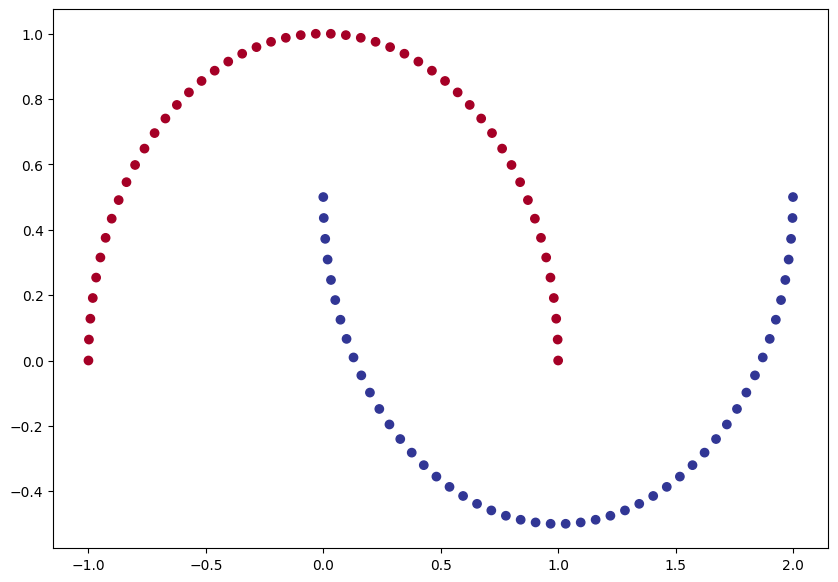

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 1. create multi-class data
X, y = make_moons(n_samples=100,
                            random_state=RANDOM_SEED)

# 2. turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# 3. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

print(X.shape, y.shape)

### 2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
class MoonModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
      Initializes multi-class classification model.

      Args:
        input_features (int): Number of input features to the mode
        output_features (int): Number of outputs features (number of output classes)
        hidden_units (int): Number of hidden units between layers, default=8

      Return:

      Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create an instance of BlobModel
model_5 = MoonModel(input_features=2,
                    output_features=1,
                    hidden_units=256).to(device)

### 3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [ ]:
## Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_5.parameters(),
                            lr=0.1)

### 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

* To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
from torchmetrics import Accuracy

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model_5.to(device)

torchmetric_accuracy = Accuracy(task="BINARY", num_classes=2).to(device)

for epoch in range(epochs):
  model_5.train()
  y_logits = model_5(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = torchmetric_accuracy(y_preds, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## Testing
  model_5.eval()

  with torch.inference_mode():
    test_logits = model_5(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = torchmetric_accuracy(test_pred, y_test)

    if epoch % 10 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Accuracy: {acc:.2f} | Test accuracy: {test_acc:.2f}')


torch.Size([80, 2]) torch.Size([80]) torch.Size([20, 2]) torch.Size([20])
Epoch: 0 | Loss: 0.71041 | Test Loss: 0.65188 | Accuracy: 0.45 | Test accuracy: 0.75
Epoch: 10 | Loss: 0.47777 | Test Loss: 0.37067 | Accuracy: 0.79 | Test accuracy: 0.95
Epoch: 20 | Loss: 0.38444 | Test Loss: 0.21321 | Accuracy: 0.80 | Test accuracy: 1.00
Epoch: 30 | Loss: 0.33359 | Test Loss: 0.14788 | Accuracy: 0.84 | Test accuracy: 1.00
Epoch: 40 | Loss: 0.30041 | Test Loss: 0.11780 | Accuracy: 0.85 | Test accuracy: 1.00
Epoch: 50 | Loss: 0.27587 | Test Loss: 0.10147 | Accuracy: 0.88 | Test accuracy: 1.00
Epoch: 60 | Loss: 0.25590 | Test Loss: 0.09061 | Accuracy: 0.88 | Test accuracy: 1.00
Epoch: 70 | Loss: 0.23811 | Test Loss: 0.08219 | Accuracy: 0.90 | Test accuracy: 1.00
Epoch: 80 | Loss: 0.22130 | Test Loss: 0.07505 | Accuracy: 0.90 | Test accuracy: 1.00
Epoch: 90 | Loss: 0.20495 | Test Loss: 0.06859 | Accuracy: 0.91 | Test accuracy: 1.00
Epoch: 100 | Loss: 0.18888 | Test Loss: 0.06275 | Accuracy: 0.93 | 

### 5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.], device='cuda:0') tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.], device='cuda:0')
tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')


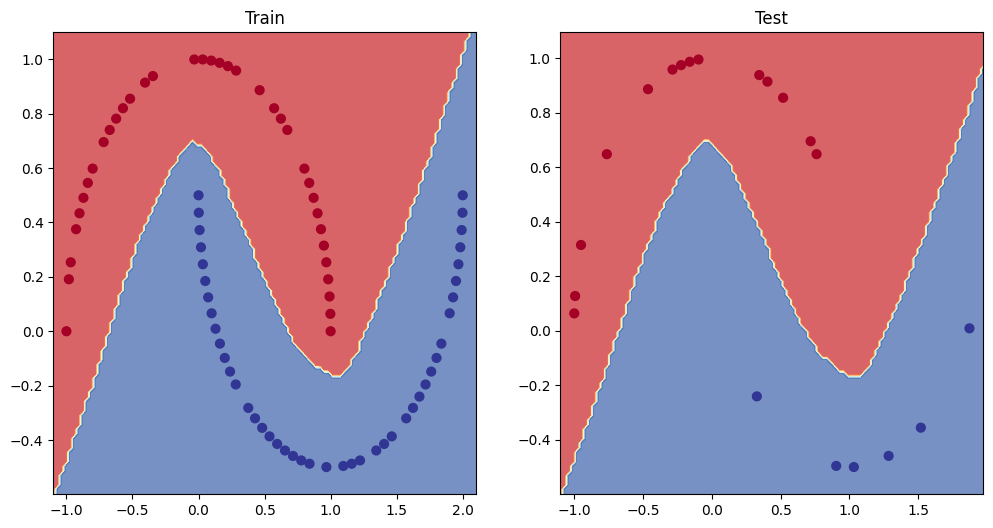

In [ ]:
model_5.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_5.to(device)(X_test.to(device)))).squeeze()

print(y_preds[:10], y_test[:10])
print(torch.eq(y_preds[:10], y_test[:10]))

# Plot decision boundary of the model
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test)

### 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch

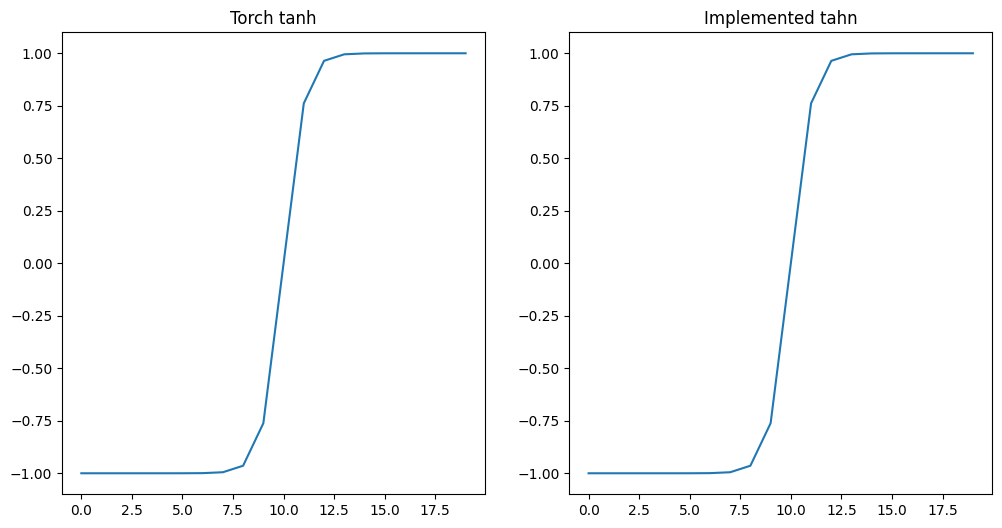

In [ ]:
A = torch.arange(-10, 10, 1.0)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Torch tanh")
plt.plot(torch.tanh(A))

def tahn(x) -> torch.tensor:
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.subplot(1,2,2)
plt.title("Implemented tahn")
plt.plot(torch.tanh(A))

### 7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

torch.Size([300, 2]) torch.Size([300])


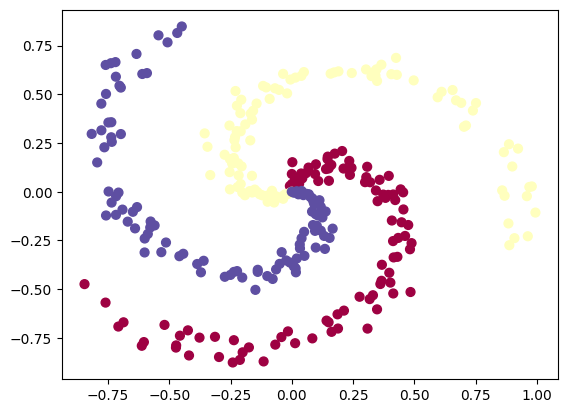

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
class SpiralModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
      Initializes multi-class classification model.

      Args:
        input_features (int): Number of input features to the mode
        output_features (int): Number of outputs features (number of output classes)
        hidden_units (int): Number of hidden units between layers, default=8

      Return:

      Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel
model_6 = SpiralModel(input_features=2,
                    output_features=3,
                    hidden_units=512).to(device)

model_6

SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=3, bias=True)
  )
)

In [ ]:
## Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model_6.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model_6.to(device)

for epoch in range(epochs):
  model_6.train()
  # Forward pass
  y_logits = model_6(X_train)
  y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

  # Compute the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Backward loss
  loss.backward()

  # Optimizer step
  optimizer.step()

  ## Testing
  model_6.eval()

  with torch.inference_mode():
    test_logits = model_6(X_test).squeeze()
    test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Accuracy: {acc:.2f}% | Test accuracy: {test_acc:.2f}%')


torch.Size([240, 2]) torch.Size([240]) torch.Size([60, 2]) torch.Size([60])
Epoch: 0 | Loss: 1.10502 | Test Loss: 0.82441 | Accuracy: 36.67% | Test accuracy: 63.33%
Epoch: 100 | Loss: 0.02425 | Test Loss: 0.00234 | Accuracy: 99.17% | Test accuracy: 100.00%
Epoch: 200 | Loss: 0.01632 | Test Loss: 0.00017 | Accuracy: 99.17% | Test accuracy: 100.00%
Epoch: 300 | Loss: 0.01457 | Test Loss: 0.00003 | Accuracy: 99.17% | Test accuracy: 100.00%
Epoch: 400 | Loss: 0.01433 | Test Loss: 0.00002 | Accuracy: 99.17% | Test accuracy: 100.00%
Epoch: 500 | Loss: 0.01434 | Test Loss: 0.00001 | Accuracy: 99.17% | Test accuracy: 100.00%
Epoch: 600 | Loss: 0.01403 | Test Loss: 0.00001 | Accuracy: 99.17% | Test accuracy: 100.00%
Epoch: 700 | Loss: 0.01409 | Test Loss: 0.00001 | Accuracy: 99.17% | Test accuracy: 100.00%
Epoch: 800 | Loss: 0.01409 | Test Loss: 0.00001 | Accuracy: 99.17% | Test accuracy: 100.00%
Epoch: 900 | Loss: 0.01398 | Test Loss: 0.00001 | Accuracy: 99.17% | Test accuracy: 100.00%


tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1], device='cuda:0') tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1], device='cuda:0')
tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')


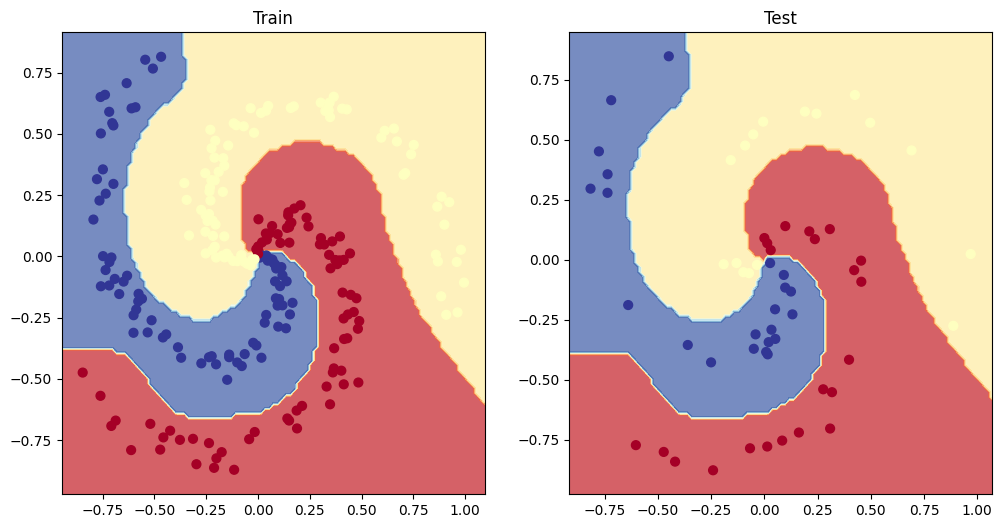

In [ ]:
model_6.eval()
with torch.inference_mode():
  y_preds = torch.argmax(torch.softmax(model_6.to(device)(X_test.to(device)), dim=1), dim=1)

print(y_preds[:10], y_test[:10])
print(torch.eq(y_preds[:10], y_test[:10]))

# Plot decision boundary of the model
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)